In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np

# Color class for prettier formatting
class Color:
   GREEN = '\033[92m'
   RED = '\033[91m'

# Loading dataset

In [3]:
file_processed = 'data/bank-additional-processed.csv'

dataset = pd.read_csv(file_processed, sep=";")

In [4]:
dataset

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487.0,2.0,NotContacted,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,346.0,4.0,NotContacted,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227.0,1.0,NotContacted,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,47,admin.,married,university.degree,yes,no,cellular,nov,mon,58.0,1.0,NotContacted,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
4,32,services,single,university.degree,no,no,cellular,sep,thu,128.0,3.0,NotContacted,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,30,admin.,married,basic.6y,yes,yes,cellular,jul,thu,53.0,1.0,NotContacted,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
3803,39,admin.,married,high.school,yes,no,telephone,jul,fri,219.0,1.0,NotContacted,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
3804,27,student,single,high.school,no,no,cellular,may,mon,64.0,2.0,NotContacted,1.0,failure,-1.8,92.893,-46.2,1.354,5099.1,no
3805,58,admin.,married,high.school,no,no,cellular,aug,fri,528.0,1.0,NotContacted,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [5]:
rows, cols = dataset.shape

print("Shape of dataset")
print(20*'-')
print(f"No of rows: {rows}\nNo of cols: {cols}")
print(20*'-')

Shape of dataset
--------------------
No of rows: 3807
No of cols: 20
--------------------


# Preparing columns for clustering

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV # for selecting optimal hyperparameters
import joblib #for saving and loading a model

#SimpleImputer for automatically filling na's with mean, median...

ordinal_features = ['education', 'housing', 'loan', 'pdays']
nominal_features = ["job", "marital", "contact", "month", "day_of_week", 'poutcome']
minmax_scaler_features = ['duration','age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# X = dataset.loc[:, dataset.columns.difference({'y'})]
X = dataset.iloc[:, :-1]
y = pd.DataFrame(LabelEncoder().fit_transform(dataset.y.values.ravel()), columns=["y"])

# encoding ordinal variables first, because it cannot be done all in one ColumnTransformer;
# keeping OrdinalEncoder in a variable, so the categories can be retreived later
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(dataset[ordinal_features])

X[ordinal_features] = ordinal_encoder.transform(X[ordinal_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

column_trans = ColumnTransformer(
    [
        # ("nominal", OneHotEncoder(), nominal_features), 
     ("numerical", MinMaxScaler(), minmax_scaler_features),
        # ("ordinal", MinMaxScaler(), ordinal_features),

    ], 
    # remaining columns, which won't be transformed using ColumnTransformer will be added;
    # otherwise, they won't be added
    # remainder="passthrough"
)

In [7]:
!pip install scikit-learn

In [8]:
# see transformed X dataframe
pd.DataFrame(column_trans.fit_transform(X), columns=column_trans.get_feature_names_out())

,numerical__duration,numerical__age,numerical__campaign,numerical__previous,numerical__emp.var.rate,numerical__cons.price.idx,numerical__cons.conf.idx,numerical__euribor3m,numerical__nr.employed
0,0.183566,0.159420,0.029412,0.000000,0.333333,0.269680,0.192469,0.156401,0.512287
1,0.130418,0.289855,0.088235,0.000000,0.937500,0.698753,0.602510,0.973472,0.859735
2,0.085564,0.086957,0.000000,0.000000,1.000000,0.882307,0.376569,0.998155,1.000000
3,0.021862,0.405797,0.000000,0.000000,0.687500,0.389322,0.368201,0.820300,0.877883
4,0.048247,0.188406,0.058824,0.333333,0.479167,0.778644,0.556485,0.057439,0.000000
...,...,...,...,...,...,...,...,...,...
3802,0.019977,0.159420,0.000000,0.000000,1.000000,0.669135,0.338912,0.997232,1.000000
3803,0.082548,0.289855,0.000000,0.000000,1.000000,0.669135,0.338912,0.997463,1.000000
3804,0.024124,0.115942,0.029412,0.166667,0.333333,0.269680,0.192469,0.165859,0.512287
3805,0.199020,0.565217,0.000000,0.000000,1.000000,0.484412,0.615063,0.999077,1.000000


In [9]:
from scipy import stats


z = np.abs(stats.zscore(dataset.select_dtypes(np.number)))
outliers = np.where(z > 3)
print((z > 3).sum())
print()
# print(outliers)

age                34
duration           90
campaign           84
previous          106
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
dtype: int64



In [10]:
dataset.shape

(3807, 20)

In [11]:
dataset1 = dataset.copy()

In [12]:
dataset1.drop(labels=outliers[0])

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487.0,2.0,NotContacted,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,346.0,4.0,NotContacted,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227.0,1.0,NotContacted,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,47,admin.,married,university.degree,yes,no,cellular,nov,mon,58.0,1.0,NotContacted,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,admin.,single,university.degree,yes,no,cellular,sep,mon,290.0,4.0,NotContacted,0.0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,30,admin.,married,basic.6y,yes,yes,cellular,jul,thu,53.0,1.0,NotContacted,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
3803,39,admin.,married,high.school,yes,no,telephone,jul,fri,219.0,1.0,NotContacted,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
3804,27,student,single,high.school,no,no,cellular,may,mon,64.0,2.0,NotContacted,1.0,failure,-1.8,92.893,-46.2,1.354,5099.1,no
3805,58,admin.,married,high.school,no,no,cellular,aug,fri,528.0,1.0,NotContacted,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


# Evaluating K-means clustering method


In [13]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=2, max_iter=100)

pipe = Pipeline([("col_trans", column_trans), ("kmeans", model_kmeans)])

pipe.fit(X_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  ['duration', 'age',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('kmeans', KMeans(max_iter=100, n_clusters=2))])

In [14]:
centers=pipe["kmeans"].cluster_centers_

In [15]:
clusters=pipe.predict(X)
pd.Series(clusters).value_counts()

1    2572
0    1235
Name: count, dtype: int64

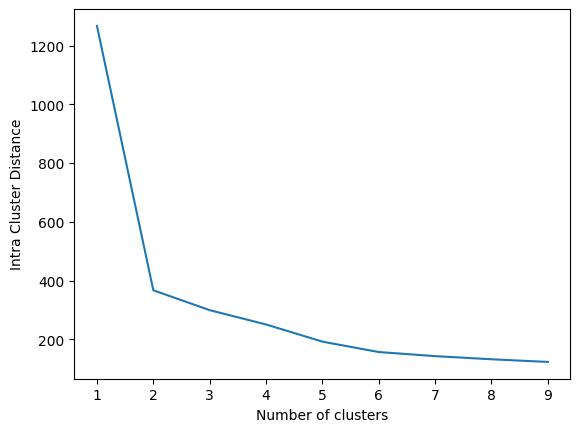

In [16]:
from sklearn.metrics import silhouette_score

sse = {}
for k in range(1, 10):
    model_kmeans = KMeans(n_clusters=k, max_iter=100)

    pipe = Pipeline([("col_trans", column_trans), ("kmeans", model_kmeans)])
    pipe.fit(X_train)
    
    cluster_labels = pipe["kmeans"].labels_
    #print(data["clusters"])
    sse[k] = pipe["kmeans"].inertia_ # Inertia: predstavlja SSE (suma odstojanja instanci od odgovarajućih centroida)
    
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance");

In [17]:
# !pip install scikit-plot
import scikitplot as skplt

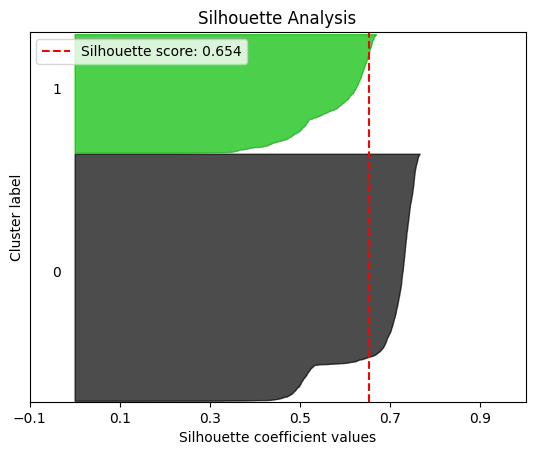

In [18]:
model_kmeans = KMeans(n_clusters=2, random_state=1)

pipe = Pipeline([("col_trans", column_trans), ("kmeans", model_kmeans)])

pipe.fit(X)
    
cluster_labels = pipe["kmeans"].labels_

# transformed X_train using ColumnTransformer
X_transformed = pd.DataFrame(column_trans.fit_transform(X), columns=column_trans.get_feature_names_out())


skplt.metrics.plot_silhouette(X_transformed, cluster_labels);

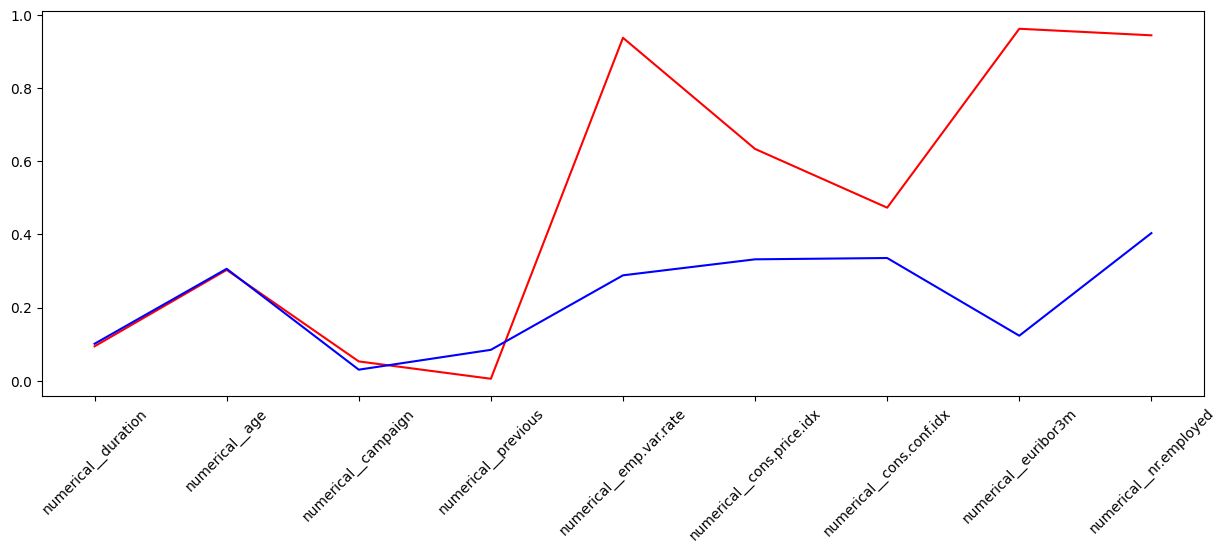

In [19]:
centers = pipe["kmeans"].cluster_centers_

# numerical_columns = ["numerical__"+col for col in minmax_scaler_features]

plt.rcParams['figure.figsize']=[15,5]
plt.plot(centers[0,:], c = 'r')
plt.plot(centers[1,:], c = 'b')
plt.xticks(list(range(0, 9)), X_transformed.columns, rotation=45);

In [20]:
dataset['cluster'] = cluster_labels
old_cols = dataset.columns.tolist()
# # # dataset
new_cols = old_cols[:-2] + [old_cols[-1]] + [old_cols[-2]]

dataset = dataset[new_cols]
dataset

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,cluster,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487.0,...,NotContacted,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,1,no
1,39,services,single,high.school,no,no,telephone,may,fri,346.0,...,NotContacted,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227.0,...,NotContacted,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,no
3,47,admin.,married,university.degree,yes,no,cellular,nov,mon,58.0,...,NotContacted,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,no
4,32,services,single,university.degree,no,no,cellular,sep,thu,128.0,...,NotContacted,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,30,admin.,married,basic.6y,yes,yes,cellular,jul,thu,53.0,...,NotContacted,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0,no
3803,39,admin.,married,high.school,yes,no,telephone,jul,fri,219.0,...,NotContacted,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0,no
3804,27,student,single,high.school,no,no,cellular,may,mon,64.0,...,NotContacted,1.0,failure,-1.8,92.893,-46.2,1.354,5099.1,1,no
3805,58,admin.,married,high.school,no,no,cellular,aug,fri,528.0,...,NotContacted,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0,no


In [21]:
dataset.cluster.value_counts()

cluster
0    2572
1    1235
Name: count, dtype: int64

## Saving cleaned data to a separate file

In [22]:
file_with_clusters = 'data/bank-additional-with-clusters.csv'

dataset.to_csv(file_with_clusters, sep=";", index=False)